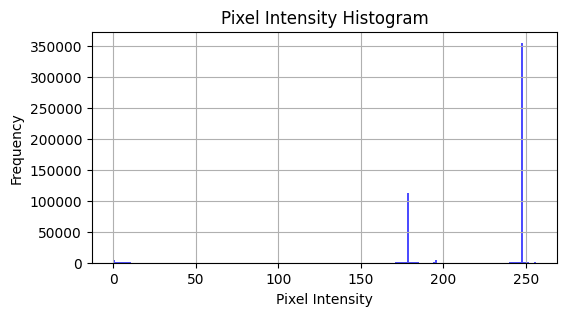

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('butterfly.png', 0)

# Plot pixel histogram
plt.figure(figsize=(6, 3))
plt.hist(image.ravel(), bins=256, range=[0,256], color='b', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Histogram')
plt.grid(True)
plt.show()

In [2]:
import cv2
import numpy as np

def region_growing(image, seed, threshold):
    # Create an empty region of the same size as the input image
    region = np.zeros_like(image, dtype=np.uint8)
    # Initialize a list to store the seed point
    region_points = [seed]
    # While there are points in the region_points list
    while region_points:
        # Pop the first point from the list
        x, y = region_points.pop(0)
        # Check if the point is not already part of the region and meets the threshold condition
        if region[x, y] == 0 and abs(int(image[x, y]) - int(image[seed])) < threshold:
            # Mark the point as part of the region
            region[x, y] = 255
            # Add neighboring points to the region_points list
            region_points.extend([(x-1, y), (x+1, y), (x, y-1), (x, y+1)])
    return region

# Load the image
image = cv2.imread('butterfly.png')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define seed point and threshold for region growing
seed_point = (150, 150)
threshold_value = 30

# Apply region growing segmentation
segmented_region = region_growing(gray_image, seed_point, threshold_value)

# Display original and segmented images
cv2.imshow('Original Image', image)
cv2.imshow('Segmented Region', segmented_region)
cv2.waitKey(0)
cv2.destroyAllWindows()